In [ ]:
from sklearn.datasets import load_iris
import  matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris=load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
features=iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
X=iris.data
X.shape

(150, 4)

In [ ]:
y=iris.target
print(y.shape)

(150,)


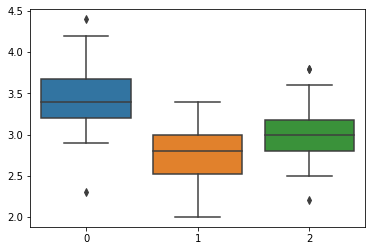

In [ ]:
sns.boxplot(x=iris.target , y=iris.data[:,1])


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [ ]:
model=LinearRegression()

In [ ]:
lin_model=model.fit(X_train,y_train)

In [ ]:
print(lin_model.score(X_test,y_test))

0.9202312444453347


In [ ]:
predictions=lin_model.predict(X_test)
print(predictions)

[ 1.70309981  1.55951072  0.0497197   2.03726534  1.12083796  0.84552228
  1.18567422  0.16659768 -0.11121663  2.14614873  1.04579549  1.27460022
 -0.02500108  1.57686918  1.74118177 -0.13151814  1.3727309   1.16266226
  0.0280966   1.76327007 -0.06659279  1.18679685 -0.00708834 -0.0882271
  1.3073964  -0.0535214   1.66331733  0.07516184  0.01025891  1.8813055
  1.65776412  1.33534838  2.22163399  1.57040353  1.73271751 -0.02444679
 -0.14210046  1.57820198]


In [ ]:
!pip install gradio

In [ ]:
def classify(num):
    if num<0.5:
        return 'Setosa'
    elif num <1.5:
        return 'Versicolor'
    else:
        return 'Virginica'

In [ ]:
import gradio as gr
import numpy as np
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    pred=lin_model.predict(input_array)
    output=classify(pred[0])
    if output=='Setosa':
      return [(0,output)]
    elif output=='Versicolor':
      return [(1,output)]
    else:
      return [(2,output)]


In [ ]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Length")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Sepal Width")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Length")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="Petal Width")
op=gr.outputs.HighlightedText(color_map={ "Setosa": "lightgreen",
        "Versicolor": "pink",
        "Virginica": "yellow",})

gr.Interface(predict_flower, inputs=[sl,sw,pl,pw], outputs=op,live=True).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://37287.gradio.app
Interface loading below...
